# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

## Normality of Data

The first question is: Is the distribution of body temperatures normal? To explore this, I plotted a hsitogram and an ECDF of the temperature data against a normal distribution with an equal mean and standard deviation. Looking at the results in the ECDF, we can conclude the distribution is approximately normal.


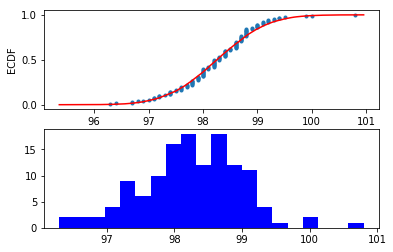

In [51]:
#define ECDF function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

f, axarr = plt.subplots(2)

#ecdf of actual data
x_temp, y_temp = ecdf(df.temperature)
axarr[0].plot(x_temp, y_temp, marker='.', linestyle='none')
axarr[1].hist(df.temperature, color='blue', bins=20)

#ecdf of normal distribution using same mean and std
samples = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=10000)
x_normtemp, y_normtemp = ecdf(samples)
axarr[0].plot(x_normtemp, y_normtemp, color='red')

axarr[0].set_xlabel('Temperature')
axarr[0].set_ylabel('ECDF')
plt.show()

## Size of Data

Is the sample size large? Are the observations independent?

## True Population Mean
**Is the true population mean really 98.6 degrees F?**

If we create a confidence interval from our data, we can be 95% sure that the population mean falls somewhere between 98.12 and 98.34 degrees. Wunderlich's claim of 98.6 degrees is a bit above our confidence interval, and should probably be rejected.

In [120]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
n = len(df.temperature)

lower = mean - (1.96*(std/np.sqrt(n)))
upper = mean + (1.96*(std/np.sqrt(n)))

print('lower:', lower, '. mean:', mean, ". upper: ", upper)

lower: 98.1236798044 . mean: 98.24923076923078 . upper:  98.374781734


**Would you use a one-sample or two-sample test? Why?**

NOT SURE

**In this situation, is it appropriate to use the  t or  z statistic?**

A z-test would be more appropriate given the same size of 300+. 

**Now try using the other test. How is the result be different? Why?**

Above 30 samples the distributions look about the same and produce the same statistic.  So using a t-test would not significantly alter the confidence interval.

## Subsampled Tests 

** Draw a sample size of 10 and repeat both tests **

In [125]:
subsample = np.random.choice(df.temperature,10)

n = len(subsample)
zstat = 1.96
tstat = 2.262

mean = np.mean(subsample)
std = np.std(subsample)

lower_z = mean - (zstat*(std/np.sqrt(n)))
upper_z = mean + (zstat*(std/np.sqrt(n)))

lower_t = mean - (tstat*(std/np.sqrt(n)))
upper_t = mean + (tstat*(std/np.sqrt(n)))

print('with Z TEST. lower:', lower_z, '. mean:', mean, ". upper: ", upper_z)
print('with T TEST. lower:', lower_t, '. mean:', mean, ". upper: ", upper_t)

with Z TEST. lower: 97.7738056416 . mean: 98.19 . upper:  98.6061943584
with T TEST. lower: 97.7096777353 . mean: 98.19 . upper:  98.6703222647


** Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the t and z statistic? **

The correct one to use in this case would be the t-statistic since n < 30. It gives a slightly wider and probably more truthful confidence interval, which makes sense since it is better to be conservative when working with a small amount of observations.

## Males vs Females

Is there a significant difference between males and females in normal temperature?
What test did you use and why? Permuatation is a nonparametric approach to
statistical significance testing.

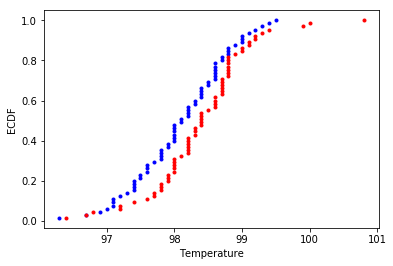

In [81]:
df_m = df[df['gender'] == 'M']
df_f = df[df['gender'] == 'F']
x_df_m, y_df_m = ecdf(df_m.temperature)
x_df_f, y_df_f = ecdf(df_f.temperature)

_ = plt.plot(x_df_m, y_df_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_df_f, y_df_f, marker='.', linestyle='none', color = 'red')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

plt.show()



It looks like females tend to have slightly higher body temperature on average.

In [113]:
for i in range(10000):
    mf_perm_sample = np.random.permutation(df.temperature)
    perm_sample1 = mf_perm_sample[:len(df_m)]
    perm_sample2 = mf_perm_sample[len(df_m):]
    perm_replicates = np.empty(10000)
    
    perm_replicates[i] = np.mean(perm_sample1)- np.mean(perm_sample2)
    emp_diff = np.mean(df_m.temperature)- np.mean(df_f.temperature)
p = np.sum(perm_replicates < emp_diff) / 10000
print('p-value is ', p)

p-value is  0.0036


With a p-value of .0036, that means that the difference of the means of the permutation replicates exceeded the difference of the means of the emperical observations less than one percent of the time. We can *reject* the null hypothesis that there is no meaningful differences between these populations and conclude that females in this study did tend to have a higher body temperature on average than males in the study.